In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
from sklearn.datasets import fetch_openml

elec_data = fetch_openml(name='electricity', version=1)

In [27]:
type(elec_data)

sklearn.utils._bunch.Bunch

In [28]:
elec_data.details

{'id': '151',
 'name': 'electricity',
 'version': '1',
 'description_version': '1',
 'format': 'ARFF',
 'creator': ['M. Harries', 'J. Gama', 'A. Bifet'],
 'collection_date': '1998-12-05',
 'upload_date': '2014-04-10T02:42:23',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://openml.org/data/v1/download/2419/electricity.arff',
 'parquet_url': 'https://data.openml.org/datasets/0000/0151/dataset_151.pq',
 'file_id': '2419',
 'default_target_attribute': 'class',
 'version_label': '1',
 'tag': ['AzurePilot',
  'concept_drift',
  'Data Science',
  'Economics',
  'electricity',
  'Kaggle',
  'mythbusting_1',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_135',
  'study_14',
  'study_15',
  'study_16',
  'study_20',
  'study_34',
  'study_37',
  'study_41',
  'study_7',
  'study_70',
  'study_99',
  'Sustainability'],
 'visibility': 'public',
 'original_data_url': 'http://www.inescporto.pt/~jgama/ales/ales_5.html',
 'paper_url': 'http://citeseerx.ist.psu.edu

In [29]:
elec_data.data.shape

(45312, 8)

In [30]:
elec_data.feature_names

['date',
 'day',
 'period',
 'nswprice',
 'nswdemand',
 'vicprice',
 'vicdemand',
 'transfer']

In [31]:
elec_data.target_names

['class']

In [32]:
elec_df = elec_data.frame

In [33]:
type(elec_df )

pandas.core.frame.DataFrame

In [34]:
|from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(elec_df , test_size=0.25,random_state=20)

print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))

SyntaxError: invalid syntax (1785958132.py, line 1)

In [35]:
train_data.head(10)

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
27325,0.469846,4,0.276596,0.164705,0.519637,0.011417,0.657949,0.265789,DOWN
28731,0.474227,5,0.574468,0.024919,0.191907,0.001656,0.090886,0.819737,DOWN
8450,0.023141,3,0.042553,0.065270,0.250074,0.003467,0.422915,0.414912,DOWN
36659,0.889385,2,0.744681,0.148193,0.670039,0.009981,0.533402,0.563596,UP
781,0.000708,4,0.276596,0.124204,0.475454,0.003467,0.422915,0.414912,UP
13013,0.428963,7,0.106383,0.055242,0.084647,0.003467,0.422915,0.414912,DOWN
3330,0.009203,1,0.382979,0.045635,0.741892,0.003467,0.422915,0.414912,DOWN
18851,0.446662,2,0.744681,0.183409,0.785034,0.012154,0.757639,0.517105,UP
14838,0.433830,3,0.127660,0.047886,0.141476,0.003467,0.422915,0.414912,DOWN
30462,0.868236,6,0.638298,0.030833,0.702023,0.001963,0.538322,0.674123,UP


In [36]:
train_data.tail()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
31962,0.875846,2,0.893617,0.028822,0.427998,0.001288,0.385293,0.813158,DOWN
23452,0.460112,7,0.595745,0.026660,0.369979,0.001774,0.234076,0.621053,DOWN
23775,0.460422,7,0.319149,0.026750,0.373550,0.001813,0.269032,0.564035,DOWN
37135,0.889828,5,0.659574,0.028462,0.555638,0.002021,0.625583,0.248684,DOWN
27098,0.469625,6,0.553191,0.054792,0.514430,0.003712,0.545572,0.229825,UP


In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33984 entries, 27325 to 27098
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   date       33984 non-null  float64 
 1   day        33984 non-null  category
 2   period     33984 non-null  float64 
 3   nswprice   33984 non-null  float64 
 4   nswdemand  33984 non-null  float64 
 5   vicprice   33984 non-null  float64 
 6   vicdemand  33984 non-null  float64 
 7   transfer   33984 non-null  float64 
 8   class      33984 non-null  category
dtypes: category(2), float64(7)
memory usage: 2.1 MB


In [38]:
train_data.describe()

,date,period,nswprice,nswdemand,vicprice,vicdemand,transfer
count,33984.000000,33984.000000,33984.000000,33984.000000,33984.000000,33984.000000,33984.000000
mean,0.498150,0.499211,0.057922,0.424763,0.003445,0.423035,0.500089
std,0.340429,0.294571,0.040195,0.163858,0.008846,0.121087,0.153224
min,0.000000,0.000000,0.000000,0.001190,0.000000,0.000000,0.000000
25%,0.031857,0.234043,0.035247,0.307944,0.002283,0.372087,0.414912
50%,0.456307,0.489362,0.048667,0.442725,0.003467,0.422915,0.414912
75%,0.880581,0.744681,0.074276,0.535704,0.003467,0.469446,0.605263
max,1.000000,1.000000,0.981806,1.000000,1.000000,1.000000,1.000000


In [39]:
train_data.isnull().sum()

,0
date,0
day,0
period,0
nswprice,0
nswdemand,0
vicprice,0
vicdemand,0
transfer,0
class,0


In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33984 entries, 27325 to 27098
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   date       33984 non-null  float64 
 1   day        33984 non-null  category
 2   period     33984 non-null  float64 
 3   nswprice   33984 non-null  float64 
 4   nswdemand  33984 non-null  float64 
 5   vicprice   33984 non-null  float64 
 6   vicdemand  33984 non-null  float64 
 7   transfer   33984 non-null  float64 
 8   class      33984 non-null  category
dtypes: category(2), float64(7)
memory usage: 2.1 MB


In [44]:
num_cols = train_data.select_dtypes(include = ['int','float']).columns

<Axes: >

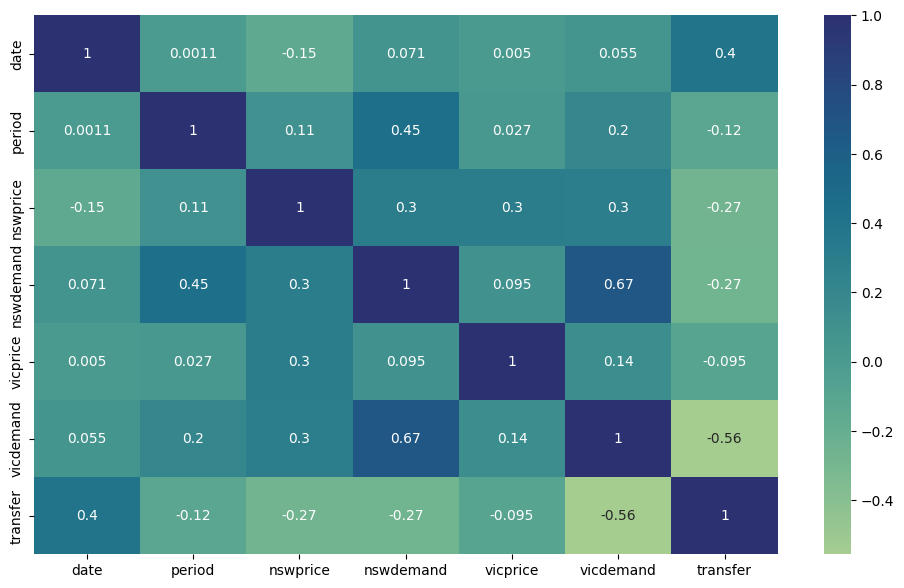

In [46]:
corr = train_data[num_cols].corr()
plt.figure(figsize=(12,7))

sns.heatmap(corr,annot=True,cmap='crest')

<Axes: xlabel='class', ylabel='count'>

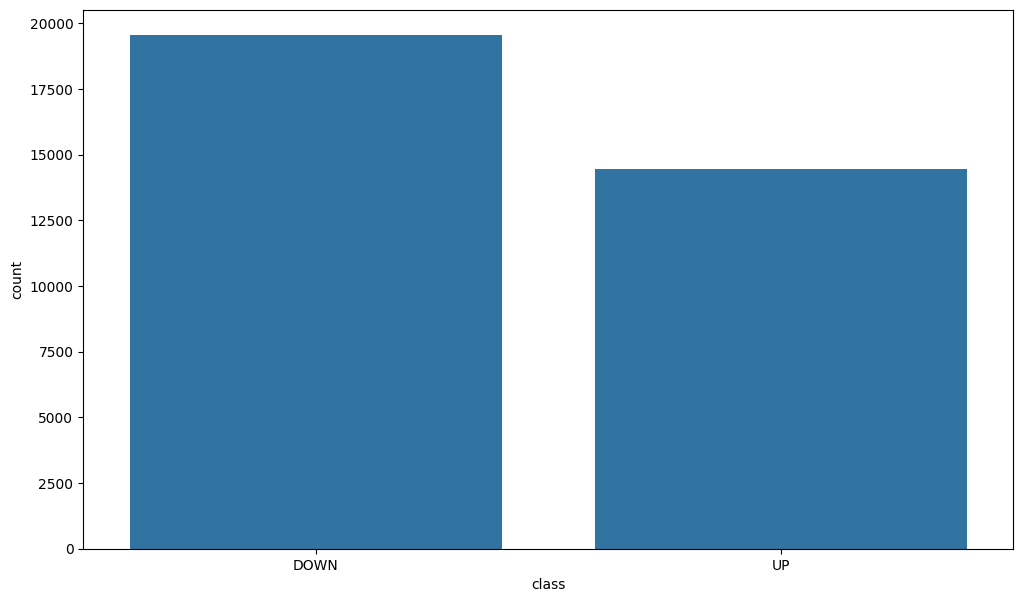

In [47]:
plt.figure(figsize=(12,7))
sns.countplot(data=train_data, x='class')

<Axes: xlabel='day', ylabel='count'>

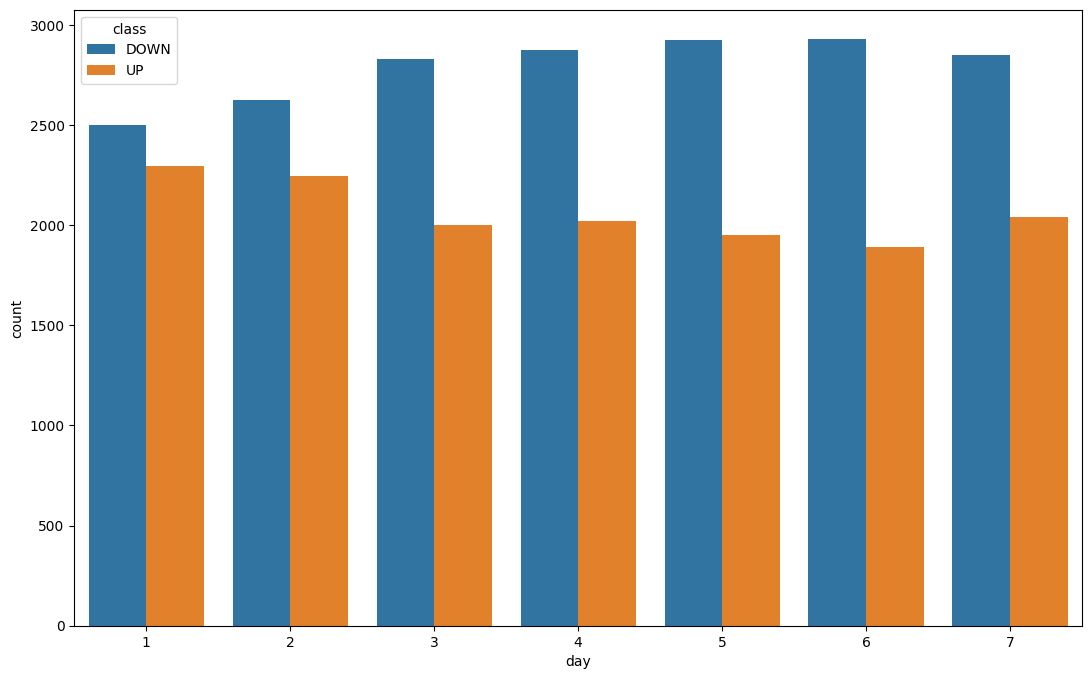

In [48]:
plt.figure(figsize=(13,8))

sns.countplot(data=train_data, x='day', hue='class')

<Axes: xlabel='vicdemand', ylabel='nswdemand'>

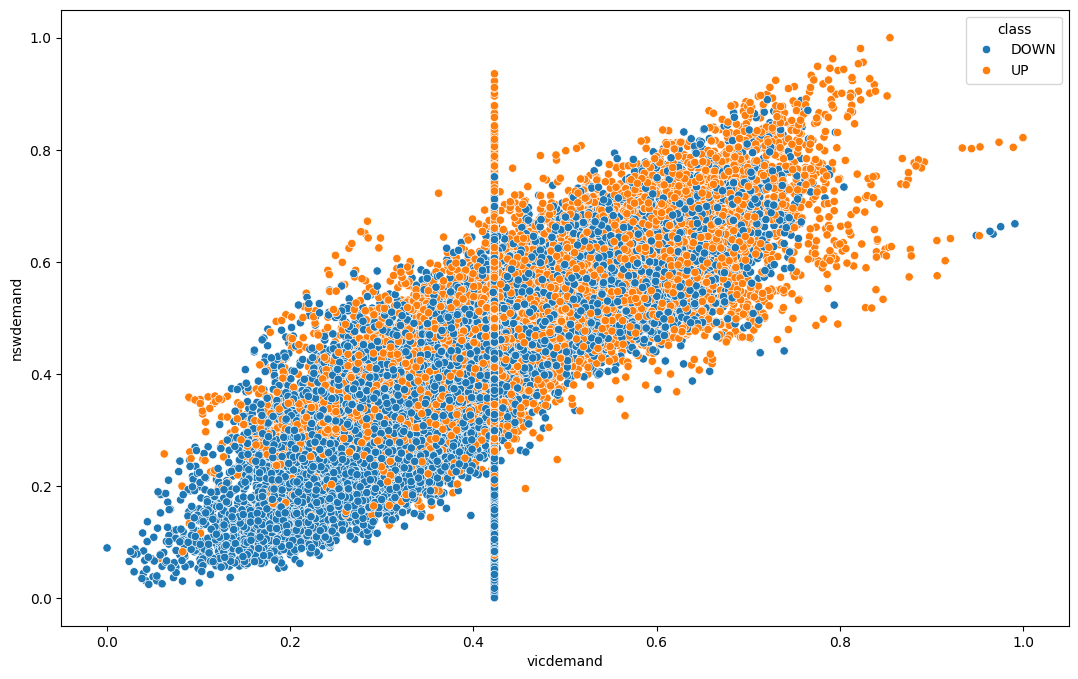

In [49]:
plt.figure(figsize=(13,8))
sns.scatterplot(data=train_data, x='vicdemand', y='nswdemand', hue='class')

<Axes: xlabel='vicdemand', ylabel='nswdemand'>

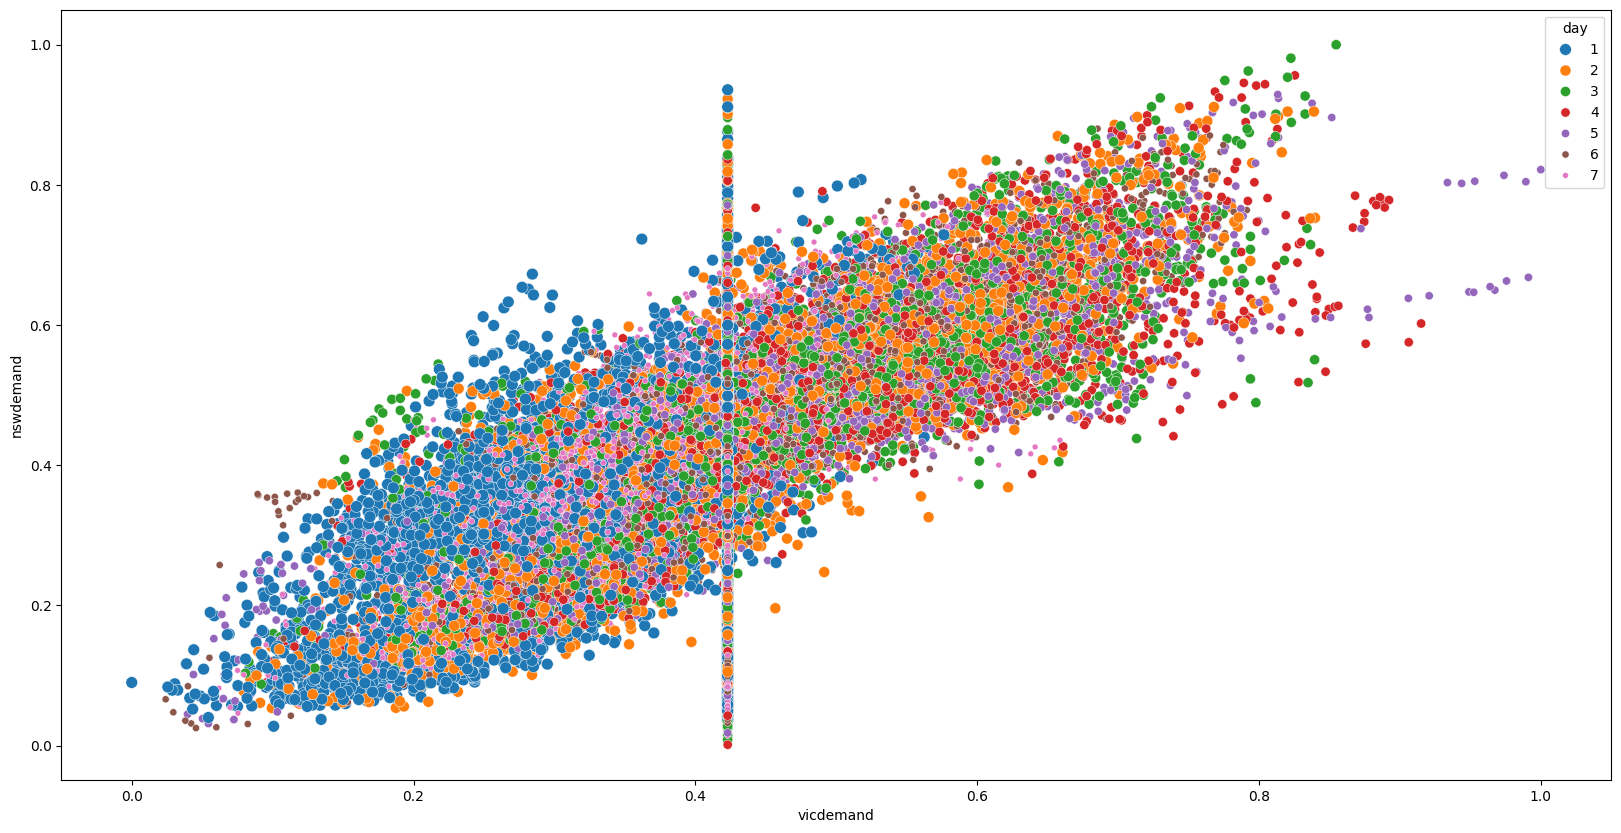

In [50]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=train_data, x='vicdemand', y='nswdemand', hue='day', size='day')

<Axes: xlabel='day', ylabel='nswdemand'>

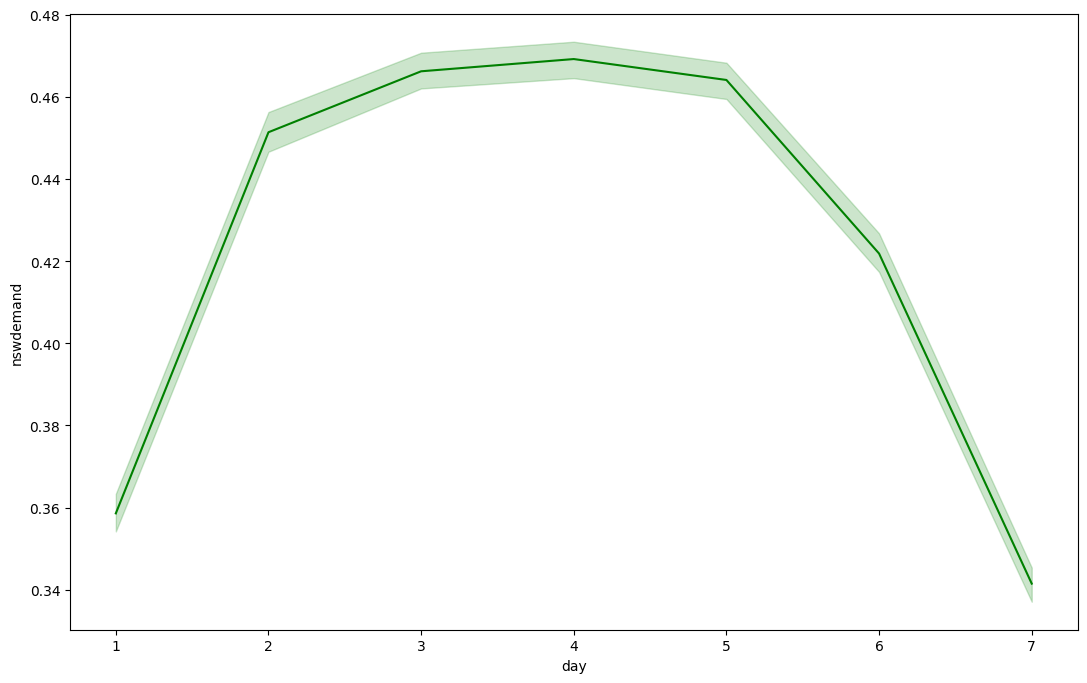

In [51]:
plt.figure(figsize=(13,8))
sns.lineplot(data=train_data, x='day', y='nswdemand', color='green')

<Axes: xlabel='day', ylabel='vicdemand'>

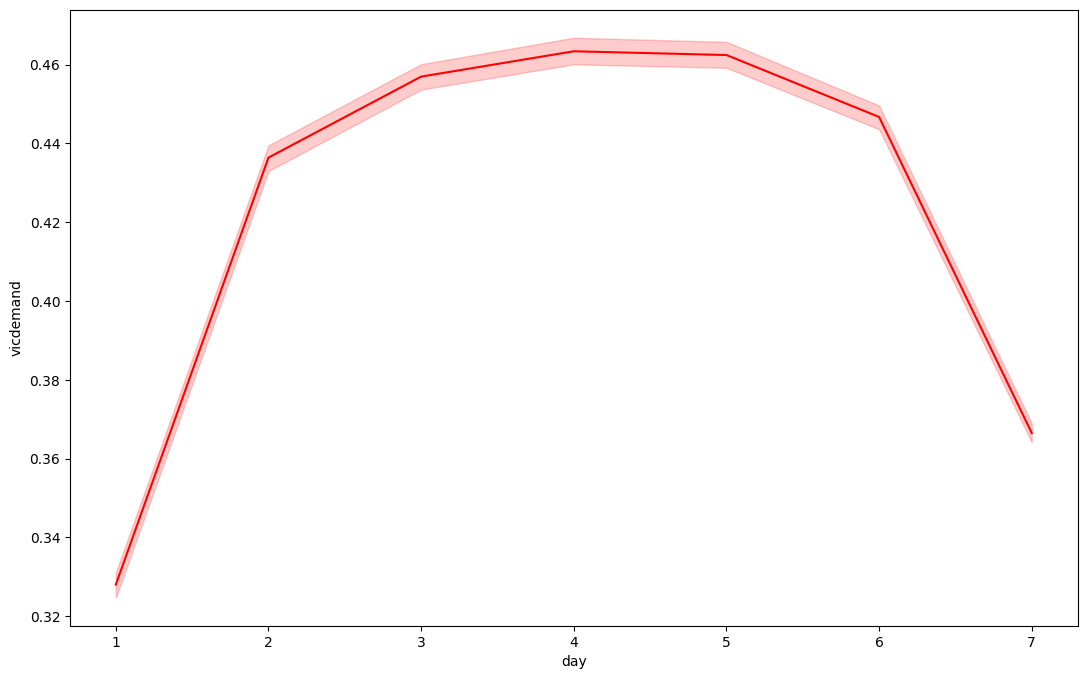

In [52]:
plt.figure(figsize=(13,8))
sns.lineplot(data=train_data, x='day', y='vicdemand', color='red')

<Axes: xlabel='date', ylabel='nswdemand'>

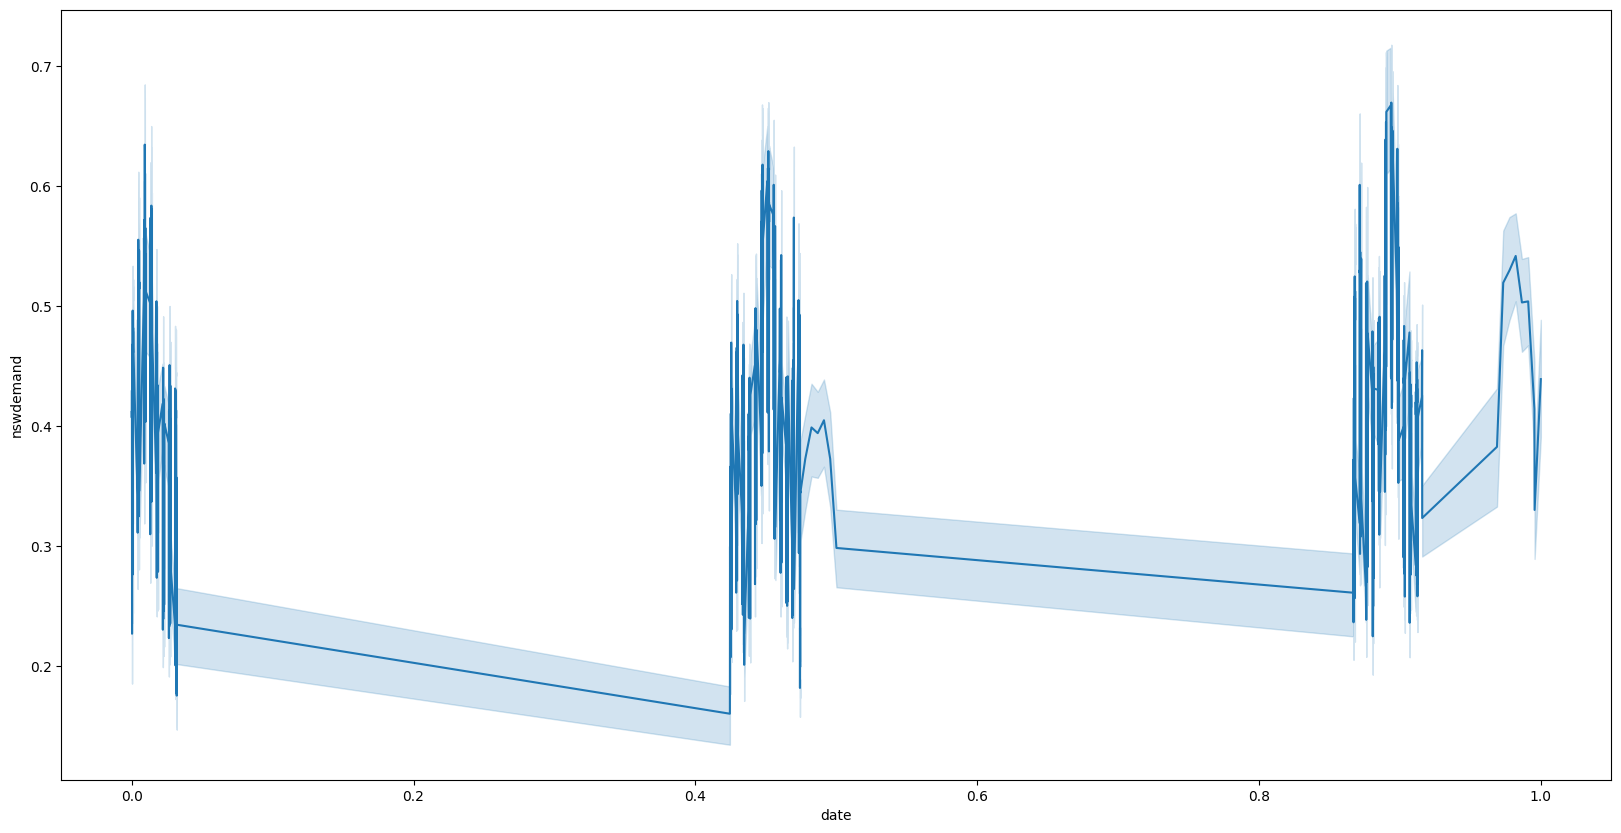

In [53]:
plt.figure(figsize=(20,10))
sns.lineplot(data=train_data, x='date', y='nswdemand')

<Axes: xlabel='date', ylabel='vicdemand'>

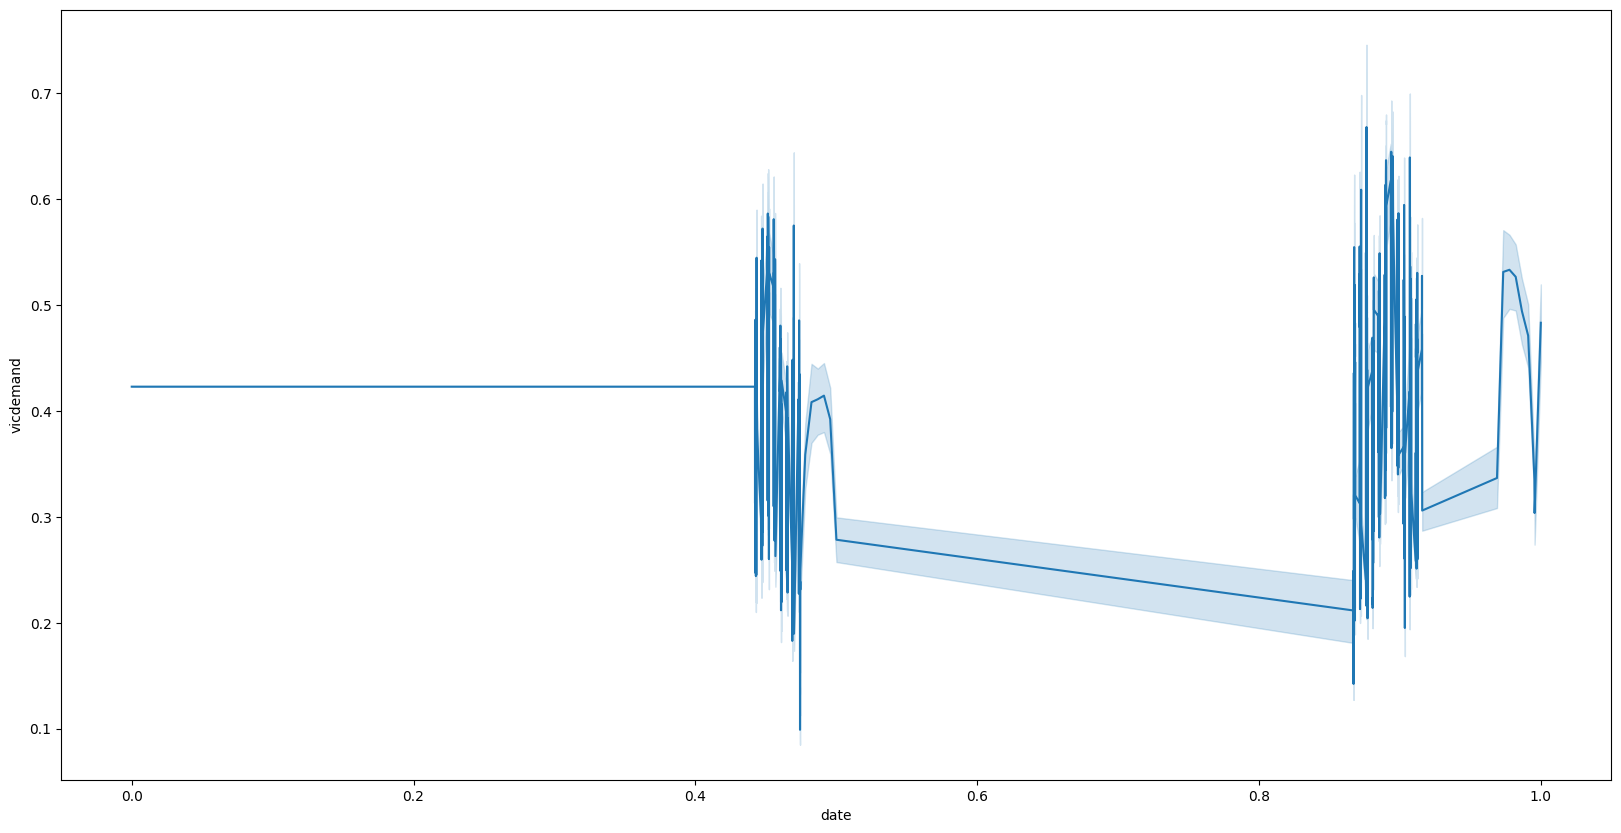

In [54]:
plt.figure(figsize=(20,10))
sns.lineplot(data=train_data, x='date', y='vicdemand')

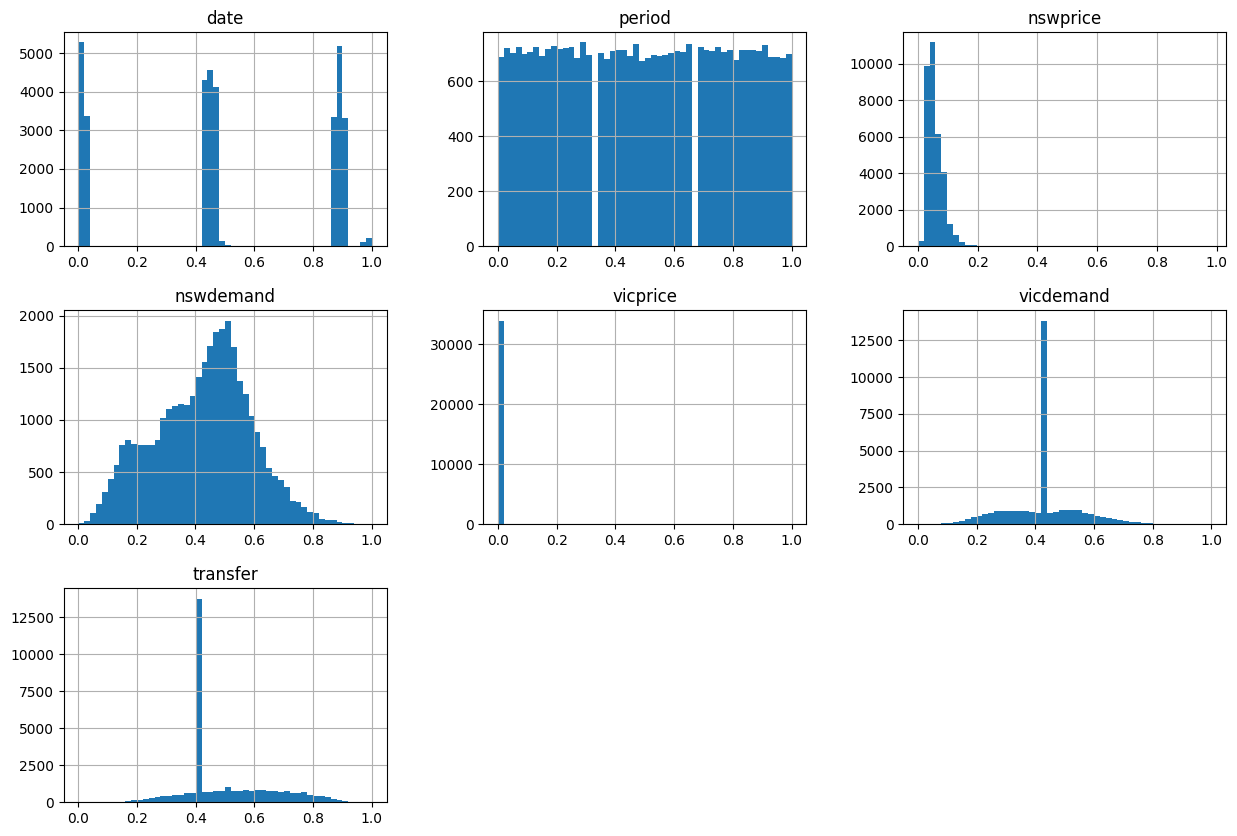

In [55]:
train_data.hist(bins=50, figsize=(15,10))
plt.show()

In [60]:
X_train = train_data.drop('class', axis=1)
y_train = train_data['class']

In [65]:
X_train['day'] = X_train['day'].astype('float64')

In [66]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
y_train_prepared = label_enc.fit_transform(y_train)

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score

log_classifier =  LogisticRegression()
sv_classifier = SVC()
sgd_classifier = SGDClassifier()


def classifiers(clf1, clf2, clf3, X_train, y_train):



    clfs = [clf1, clf2, clf3]

    all_clfs_acc = []


    for clf in clfs:

        clf.fit(X_train, y_train)
        preds = clf.predict(X_train)
        acc = accuracy_score(y_train,preds)
        # acc = acc.tolist()
        all_clfs_acc.append(acc)

    return all_clfs_acc

In [74]:
classifiers(log_classifier,sv_classifier, sgd_classifier, X_train, y_train_prepared)

[0.7510004708097928, 0.7368761770244822, 0.7530896892655368]

In [75]:
from sklearn.ensemble import VotingClassifier

vot_classifier = VotingClassifier(

    estimators=[('log_reg', log_classifier),
                ('svc', sv_classifier),
                ('sgd', sgd_classifier)],
    voting='hard')

vot_classifier.fit(X_train, y_train_prepared)

VotingClassifier(estimators=[('log_reg', LogisticRegression()), ('svc', SVC()),
                             ('sgd', SGDClassifier())])

In [76]:
from sklearn.metrics import accuracy_score

def accuracy(model, data, labels):

    predictions = model.predict(data)
    acc = accuracy_score(labels, predictions)

    return acc

In [77]:
accuracy(vot_classifier, X_train, y_train_prepared)

0.754708097928437

In [78]:
sv_classifier = SVC(probability=True)

vot_classifier = VotingClassifier(

    estimators=[('log_reg', log_classifier),
                ('svc', sv_classifier),
                ('sgd', sgd_classifier)],
    voting='soft')

vot_classifier.fit(X_train, y_train_prepared)
accuracy(vot_classifier, X_train, y_train_prepared)

AttributeError: This 'SGDClassifier' has no attribute 'predict_proba'

In [80]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_classifier = BaggingClassifier(
      DecisionTreeClassifier(class_weight='balanced'),
    max_samples=0.5, max_features=0.5, bootstrap=False
)

bag_classifier.fit(X_train, y_train_prepared)
accuracy(bag_classifier, X_train, y_train_prepared)

0.974223163841808

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(
                        n_estimators=500,
                        learning_rate=0.8,
                        random_state=42,
                        max_depth=2)

grad_boost_clf.fit(X_train, y_train_prepared)
accuracy(grad_boost_clf, X_train, y_train_prepared)

0.9269362052730696

In [82]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adaboost_clf = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3, class_weight='balanced'),
    #base estimator is decision trees by default
    n_estimators=300,
    learning_rate=0.5

)

adaboost_clf.fit(X_train, y_train_prepared)
accuracy(adaboost_clf, X_train, y_train_prepared)

TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


base_estimators = [
    ('rand', RandomForestClassifier(random_state=42)),
    ('svc', SVC(random_state=42))]

final_estimator = LogisticRegression()

stack_clf = StackingClassifier(estimators = base_estimators,
                               final_estimator = final_estimator)

stack_clf.fit(X_train, y_train_prepared)
accuracy(stack_clf, X_train, y_train_prepared)

In [ ]:
# XGBoost can be installed like other libraries, just by pip install xgboost.

# import xgboost as xgb

# xgb_clf = xgb.XGBClassifier()
# xgb_clf.fit(X_train, y_train_prepared)